# Data Processing

Process patient data from wireless gait sensor for statistical analysis and training machine learning classifiers.

There are 2 folders, *Abnormal Data* & *Normal Data*. Abnormal data was collected under 7 conditions, as collected in 7 sheets in the Microsoft Excel spreadsheet *abnormal_data.xlsx*. This data seems to be different than that in *1_condition2.lvm, ..., 1_condition7.lvm*, and it is not clear at this time what the .lvm files correspond to.

* [Condition 1](#Condition-1)
* [Condition 2](#Condition-2)
* [Condition 3](#Condition-3)
* [Condition 4](#Condition-4)
* [Condition 5](#Condition-5)
* [Condition 6](#Condition-6)
* [Condition 7](#Condition-7)

The *Normal Data* directory contains data for a Condition 8; it is not clear what Condition 8 refers to.

In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
import os.path

In [4]:
import pandas as pd

---

## Condition 1

**2018 March 31; April 1, 6-7, 10, 14-16, 24, 28, 30**

Read in Microsoft Excel spreadsheet containing data from abnormal patients under Condition 1. Separate out the subject numbers into a separate vector from the gait sensor data.

In [5]:
abnormal_filename = os.path.join('..', 'data', 'Abnormal Data', 'abnormal_data.xlsx')

In [6]:
abnorm_sht1 = pd.read_excel(abnormal_filename, sheetname='Condition 1')

In [64]:
abnorm_sht1.head()

Subject   GX   GY        GZ       AX        AY        AZ
0      1.0  0.0  0.0  0.000000  0.00000  0.000000  0.000000
1      NaN  0.0  0.0  1.426758  0.00000  0.000000  0.000000
2      NaN  0.0  0.0  1.426758  1.31543  0.000000  0.000000
3      NaN  0.0  0.0  1.426758  1.31543  1.432617  0.000000
4      NaN  0.0  0.0  1.426758  1.31543  1.432617  1.139648

In [7]:
subj_idx = abnorm_sht1['Subject']

In [66]:
subj_idx.head()

0    1.0
1    NaN
2    NaN
3    NaN
4    NaN
Name: Subject, dtype: float64

Fill in NaN's with subject numbers.

In [67]:
subj_idx.dropna()

0         1.0
1090      2.0
1735      3.0
1934      4.0
2852      5.0
3735      6.0
3808      7.0
4720      8.0
6462      7.0
6687      8.0
8045      9.0
8900     10.0
9429     11.0
9958     12.0
10716    13.0
Name: Subject, dtype: float64

In [68]:
subj_idx.dropna().index

Int64Index([    0,  1090,  1735,  1934,  2852,  3735,  3808,  4720,  6462,
             6687,  8045,  8900,  9429,  9958, 10716],
           dtype='int64')

In [8]:
subj_idx_dropna = subj_idx.dropna()
for i in range(1, subj_idx_dropna.index.size):
    start_idx = subj_idx_dropna.index[i-1]
    end_idx = subj_idx_dropna.index[i]
    fill_val = subj_idx_dropna.iloc[i-1]
    subj_idx.iloc[start_idx:end_idx].fillna(fill_val, inplace=True)
i = subj_idx_dropna.index.size - 1
start_idx = subj_idx_dropna.index[i]
fill_val = int(subj_idx_dropna.iloc[i])
subj_idx.iloc[start_idx:].fillna(fill_val, inplace=True)
subj_idx = subj_idx.astype('int32')

In [9]:
abnorm_data_1 = abnorm_sht1.iloc[:, 1:]

In [9]:
abnorm_data_1.head()

GX   GY        GZ       AX        AY        AZ
0  0.0  0.0  0.000000  0.00000  0.000000  0.000000
1  0.0  0.0  1.426758  0.00000  0.000000  0.000000
2  0.0  0.0  1.426758  1.31543  0.000000  0.000000
3  0.0  0.0  1.426758  1.31543  1.432617  0.000000
4  0.0  0.0  1.426758  1.31543  1.432617  1.139648

The *Normal Data* directory contains 8 conditions, each with multiple versions ("B", "converted"). For example, for condition 5 there are: *AR_Data_Condition5.csv*, *AR_Data_Condition5_B.csv*, *AR_Data_Condition5_converted.csv*. The version to use should have subject numbers included. 

In [14]:
norm_cond1_file = os.path.join('..', 'data', 'Normal Data', 'AR_Data_Condition1_converted.xls')

Unfortunately, this file has extra rows following each subject data for mean, std, etc., which will be removed.

In [15]:
norm_cond1_data = pd.read_excel(norm_cond1_file, skiprows=[0])

In [91]:
norm_cond1_data.head()

Unnamed: 0  G X  G Y  G Z      A X  A Y      A Z     GX     GY     GZ  \
0        11.0  0.0  0.0  0.0  0.00000  0.0        0  360.0  360.0  360.0   
1         NaN  0.0  0.0  0.0  0.00000  0.0        0  360.0  360.0  360.0   
2         NaN  0.0  0.0  0.0  1.59082  0.0        0  360.0  360.0  360.0   
3         NaN  0.0  0.0  0.0  1.59082  0.0        0  360.0  360.0  360.0   
4         NaN  0.0  0.0  0.0  1.59082  0.0  1.63769  360.0  360.0  360.0   

   AX (m/s^2)    AY         AZ  Unnamed: 13 Unnamed: 14  
0   58.800000  58.8  58.800000          NaN         NaN  
1   58.800000  58.8  58.800000          NaN         NaN  
2    3.560144  58.8  58.800000          NaN         NaN  
3    3.560144  58.8  58.800000          NaN         NaN  
4    3.560144  58.8   5.397644          NaN         NaN

In [60]:
norm_cond1_data.shape

(9140, 15)

In [16]:
norm_cond1_data.dropna(axis=1, how='all', inplace=True)

In [17]:
norm_cond1_data.rename(columns={'Unnamed: 0': 'Subject'}, inplace=True)

In [96]:
norm_cond1_data[norm_cond1_data['Unnamed: 14'].notnull()]

Subject       G X       G Y       G Z       A X  A Y      A Z       GX  \
8      NaN  1.505859  1.725586  1.734375  1.898437  0.0  1.63769  1.40616   

         GY     GZ  AX (m/s^2)    AY        AZ Unnamed: 14  
8  54.14064  56.25    15.61873  58.8  5.397644

In [18]:
norm_cond1_data.drop(labels='Unnamed: 14', axis=1, inplace=True)

In [102]:
norm_cond1_data.head()

Subject  G X  G Y  G Z      A X  A Y      A Z     GX     GY     GZ  \
0     11.0  0.0  0.0  0.0  0.00000  0.0        0  360.0  360.0  360.0   
1      NaN  0.0  0.0  0.0  0.00000  0.0        0  360.0  360.0  360.0   
2      NaN  0.0  0.0  0.0  1.59082  0.0        0  360.0  360.0  360.0   
3      NaN  0.0  0.0  0.0  1.59082  0.0        0  360.0  360.0  360.0   
4      NaN  0.0  0.0  0.0  1.59082  0.0  1.63769  360.0  360.0  360.0   

   AX (m/s^2)    AY         AZ  
0   58.800000  58.8  58.800000  
1   58.800000  58.8  58.800000  
2    3.560144  58.8  58.800000  
3    3.560144  58.8  58.800000  
4    3.560144  58.8   5.397644

In [19]:
norm_cond1_data.dropna(subset=['G X'], inplace=True)

In [103]:
norm_cond1_data.shape

(9040, 13)

In [104]:
norm_cond1_data.iloc[330:340, :]

Subject       G X       G Y       G Z       A X       A Y      A Z  \
330      NaN  1.505859  1.696289  1.731445  1.822266  2.176758  1.66113   
336     12.0  0.000000  0.000000  0.000000  0.000000  0.000000        0   
337      NaN  0.000000  0.000000  0.000000  0.000000  0.000000        0   
338      NaN  0.000000  0.000000  1.737305  0.000000  0.000000        0   
339      NaN  0.000000  0.000000  1.737305  1.746094  0.000000        0   
340      NaN  0.000000  0.000000  1.737305  1.746094  2.156250        0   
341      NaN  0.000000  0.000000  1.737305  1.746094  2.156250  1.67578   
342      NaN  1.505859  0.000000  1.737305  1.746094  2.156250  1.67578   
343      NaN  1.505859  1.716797  1.737305  1.746094  2.156250  1.67578   
344      NaN  1.505859  1.716797  1.751953  1.746094  2.156250  1.67578   

            GX         GY         GZ  AX (m/s^2)         AY         AZ  
330    1.40616   47.10936   55.54680   12.632827  26.528914   6.316414  
336  360.00000  360.00000  360.00000   58.800000  58.800000  58.800000  
337  360.00000  360.00000  360.00000   58.800000  58.800000  58.800000  
338  360.00000  360.00000   56.95320   58.800000  58.800000  58.800000  
339  360.00000  360.00000   56.95320    9.646885  58.800000  58.800000  
340  360.00000  360.00000   56.95320    9.646885  25.725000  58.800000  
341  360.00000  360.00000   56.95320    9.646885  25.725000   6.890615  
342    1.40616  360.00000   56.95320    9.646885  25.725000   6.890615  
343    1.40616   52.03128   56.95320    9.646885  25.725000   6.890615  
344    1.40616   52.03128   60.46872    9.646885  25.725000   6.890615

In [105]:
norm_cond1_data.tail()

Subject       G X       G Y       G Z       A X       A Y      A Z  \
9130      NaN  1.658203  1.737305  1.839844  1.872070  2.138672  1.69336   
9131      NaN  1.658203  1.737305  1.839844  1.869141  2.138672  1.69336   
9132      NaN  1.705078  1.737305  1.839844  1.869141  2.138672  1.69336   
9133      NaN  1.705078  1.760742  1.839844  1.869141  2.138672  1.69336   
9134      NaN  1.705078  1.760742  1.845703  1.869141  2.138672  1.69336   

            GX        GY        GZ  AX (m/s^2)         AY        AZ  
9130  37.96872  56.95320  81.56256   14.585144  25.035942  7.579673  
9131  37.96872  56.95320  81.56256   14.470327  25.035942  7.579673  
9132  49.21872  56.95320  81.56256   14.470327  25.035942  7.579673  
9133  49.21872  62.57808  81.56256   14.470327  25.035942  7.579673  
9134  49.21872  62.57808  82.96872   14.470327  25.035942  7.579673

Create function from code above to fill in subject numbers

In [13]:
def fill_in_subject_nums(subj_vec):
    subj_vec_fill = pd.Series(np.empty(subj_vec.size, dtype=int), name='Subject')
    subj_vec_dropna = subj_vec.dropna()
    for i in range(1, subj_vec_dropna.index.size):
        start_idx = subj_vec_dropna.index[i-1]
        end_idx = subj_vec_dropna.index[i]
        fill_val = subj_vec_dropna.iloc[i-1]
        subj_vec_fill[start_idx:end_idx] = subj_vec.iloc[start_idx:end_idx].fillna(fill_val).values
    i = subj_vec_dropna.index.size - 1
    start_idx = subj_vec_dropna.index[i]
    fill_val = int(subj_vec_dropna.iloc[i])
    subj_vec_fill[start_idx:] = subj_vec.iloc[start_idx:].fillna(fill_val).values
    subj_vec_fill = subj_vec_fill.astype('int32')
    return subj_vec_fill

In [21]:
cond1_abnorm_subj = fill_in_subject_nums(subj_idx)

In [23]:
cond1_abnorm_subj.equals(subj_idx)

True

In [24]:
cond1_abnorm_subj.head()

0    1
1    1
2    1
3    1
4    1
Name: Subject, dtype: int32

In [25]:
cond1_abnorm_subj.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [20]:
norm_subj1 = fill_in_subject_nums(norm_cond1_data['Subject'])

In [24]:
norm_subj1.unique()

array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
       28, 29, 30])

In [21]:
norm_cond1_data = norm_cond1_data.iloc[:, 1:7]

In [26]:
norm_cond1_data.head()

G X  G Y  G Z      A X  A Y      A Z
0  0.0  0.0  0.0  0.00000  0.0        0
1  0.0  0.0  0.0  0.00000  0.0        0
2  0.0  0.0  0.0  1.59082  0.0        0
3  0.0  0.0  0.0  1.59082  0.0        0
4  0.0  0.0  0.0  1.59082  0.0  1.63769

In [53]:
norm_cond1_data.shape

(9040, 13)

Define function to calculate range by subject for each feature

In [10]:
def range_by_subject(subj_vec, data):
    uniq_subj = subj_vec.unique()
    range_df = pd.DataFrame(np.empty((uniq_subj.size, data.shape[1])), 
                            index=uniq_subj, columns=data.columns)
    for i, subj_num in enumerate(uniq_subj):
        df = data.loc[subj_vec == subj_num]
        nzdf = df.where(df != 0)
        r = nzdf.max() - nzdf.min()
        range_df.iloc[i, :] = r.values
    return range_df

Abnormal feature ranges in Condition 1:

In [73]:
abnorm_range1 = range_by_subject(subj_idx, abnorm_data_1)

In [12]:
abnorm_range1

GX        GY        GZ        AX        AY        AZ
1   0.084961  0.023438  0.219727  0.052735  0.609375  0.158203
2   0.603516  0.178711  1.031250  0.149414  1.986328  0.304688
3   0.008789  0.005860  0.005860  0.002929  0.017578  0.023437
4   0.029297  0.005859  0.026367  0.002930  0.052734  0.164063
5   0.219726  0.055664  0.427734  0.038085  0.729492  0.175781
6   0.014648  0.005860  0.023437  0.002929  0.064453  0.155273
7   0.357422  0.448242  0.454102  0.793945  1.804687  0.500977
8   0.495117  0.266601  0.480469  0.120118  0.764648  0.193359
9   0.826172  0.363281  0.219726  0.158203  0.184570  0.111328
10  0.489258  0.336915  0.178711  0.131836  0.111328  0.108399
11  9.738000  0.489258  0.336915  0.178711  0.131836  0.111328
12  7.438000  1.927735  1.253906  0.269531  0.319336  0.375000
13  7.952000  0.269531  0.468750  0.878906  0.187500  0.134766

In [30]:
abnorm_data_1.loc[subj_idx == 11]['GX'].max()

11.762

It appears that GX for subjects 11-13 are anomalous, with voltage values far exceeding all others. Excluding these subjects yields the following box plot:

In [17]:
abnorm_data_1.where(abnorm_data_1 != 0).iloc[subj_idx.values < 11, :].plot.box()

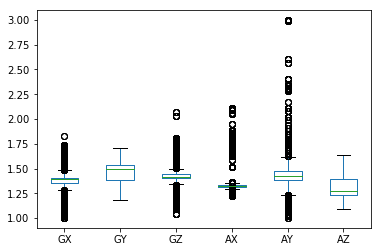

In [18]:
plt.show()

Normal feature ranges in Condition 1. Note that both indexes of subject number vector and data frame have to be the same. Or else "IndexingError: Unalignable boolean Series provided as indexer..." error is thrown.

In [16]:
norm_subj1.index

RangeIndex(start=0, stop=9040, step=1)

In [17]:
norm_cond1_data.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            9125, 9126, 9127, 9128, 9129, 9130, 9131, 9132, 9133, 9134],
           dtype='int64', length=9040)

In [22]:
norm_cond1_data.index = norm_subj1.index

In [20]:
norm_cond1_data.tail()

G X       G Y       G Z       A X       A Y      A Z
9035  1.658203  1.737305  1.839844  1.872070  2.138672  1.69336
9036  1.658203  1.737305  1.839844  1.869141  2.138672  1.69336
9037  1.705078  1.737305  1.839844  1.869141  2.138672  1.69336
9038  1.705078  1.760742  1.839844  1.869141  2.138672  1.69336
9039  1.705078  1.760742  1.845703  1.869141  2.138672  1.69336

In [23]:
norm_range1 = range_by_subject(norm_subj1, norm_cond1_data)

In [17]:
norm_range1

G X       G Y       G Z       A X       A Y       A Z
11  0.750000  0.536133  0.474609  0.410157  1.365234  0.398437
12  0.963868  0.205078  0.172852  0.137695  0.032227  0.190429
13  0.187500  0.208008  0.313477  0.474609  0.175781  0.190429
14  0.205078  0.202148  0.210938  0.137695  0.046875  0.193359
15  0.878906  0.164062  0.190430  0.137695  0.046875  0.175781
16  0.243164  0.190430  0.155273  0.152344  0.049805  0.307617
17  0.175781  0.090821  0.041016  0.020508  0.011719  0.172852
18  0.161133  0.114258  0.073242  0.032226  0.017578  0.169922
19  0.196290  0.166992  0.184570  0.038086  0.020508  0.184571
20  0.208008  0.184571  0.196289  0.038086  0.017578  0.169922
21  0.193359  0.155273  0.208007  0.131836  0.498047  0.219726
22  0.208008  0.178711  0.193359  0.137695  0.026368  0.205078
23  0.196289  0.114257  0.208008  0.137695  0.043945  0.178711
24  0.172852  1.391602  1.374023  1.347656  0.029297  0.216797
25  1.409180  1.394531  1.379883  1.227539  0.035156  0.184570
26  0.231445  0.199219  0.196290  0.043946  0.017578  0.205078
27  0.240234  0.210937  0.202149  0.137696  0.023438  0.199218
28  0.184570  0.172852  0.216797  0.137695  0.038086  0.190430
29  0.196289  0.149414  0.196289  0.380859  1.048828  0.187500
30  0.219726  0.184570  0.184570  0.105469  0.038086  0.187500

In [32]:
norm_cond1_data.where(norm_cond1_data != 0).plot.box()

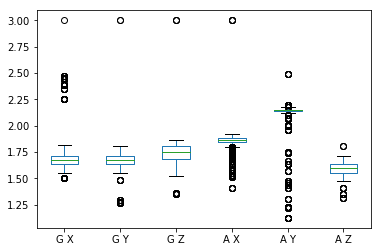

In [33]:
plt.show()

Combine abnormal & normal into a single dataframe with ~~subject numbers~~, condition number, and labels. Abnormal will be labeled 1, and normal labeled 0. Write resulting dataframe to output file. 

*NOTE*: subject numbers will not be written out, as condition 7 data has no subject numbers included.

In [24]:
def combine_condition_data(abnorm_data, norm_data, cond_num):
    ##abnorm_subj = pd.DataFrame(abnorm_data.index.values, columns=['Subject'], dtype='int')
    ##abnorm_data = abnorm_data.reset_index(drop=True)
    abnorm_combine = abnorm_data.reset_index(drop=True)
    ##abnorm_combine = pd.concat([abnorm_subj, abnorm_data], axis=1)
    abnorm_labels = pd.DataFrame(np.ones((abnorm_combine.shape[0], 1)), 
                                 columns=['Label'], dtype='int')
    abnorm_combine = pd.concat([abnorm_combine, abnorm_labels], axis=1)
    ##abnorm_combine.columns = ['Subject', 'GX', 'GY', 'GZ', 'AX', 'AY', 'AZ', 'Label']
    abnorm_combine.columns = ['GX', 'GY', 'GZ', 'AX', 'AY', 'AZ', 'Label']
    ##norm_subj = pd.DataFrame(norm_data.index.values, columns=['Subject'], dtype='int')
    ##norm_data = norm_data.reset_index(drop=True)
    norm_combine = norm_data.reset_index(drop=True)
    ##norm_combine = pd.concat([norm_subj, norm_data], axis=1)
    norm_labels = pd.DataFrame(np.zeros((norm_combine.shape[0], 1)), 
                               columns=['Label'], dtype='int')
    norm_combine = pd.concat([norm_combine, norm_labels], axis=1)
    ##norm_combine.columns = ['Subject', 'GX', 'GY', 'GZ', 'AX', 'AY', 'AZ', 'Label']
    norm_combine.columns = ['GX', 'GY', 'GZ', 'AX', 'AY', 'AZ', 'Label']
    combined_data = pd.concat([abnorm_combine, norm_combine], ignore_index=True)
    cond_col = pd.DataFrame(np.full((combined_data.shape[0], 1), cond_num), 
                            columns=['Condition'], dtype='int')
    combined_data = pd.concat([cond_col, combined_data], axis=1)
    return combined_data

In [25]:
cond1_combined = combine_condition_data(abnorm_range1.iloc[:10, :], norm_range1, 1)

In [84]:
cond1_output_file = os.path.join('..', 'data', 'processed', 'cond1_combined_range.csv')
cond1_combined.to_csv(cond1_output_file, index=False)

***

## Condition 2

Remember to define `fill_in_subject_nums` function from above.

*NOTE*: The Microsoft Excel spreadsheet as downloaded for the abnormal data has the sheet name for Condition 2 misspelled as "Conditon 2"; this has been manually corrected.

**April 24, 29-30**

In [28]:
abnormal_filename = os.path.join('..', 'data', 'Abnormal Data', 'abnormal_data.xlsx')
abnorm_sheet2 = pd.read_excel(abnormal_filename, sheetname='Condition 2')
cond2_abnorm_subj = fill_in_subject_nums(abnorm_sheet2['Subject'])
abnorm_data_2 = abnorm_sheet2.iloc[:, 1:]

Abnormal feature ranges in Condition 2:

In [29]:
abnorm_range2 = range_by_subject(cond2_abnorm_subj, abnorm_data_2)

In [33]:
abnorm_range2

GX        GY      GX.1        AX        AY        AZ
1   0.263672  0.067382  0.363281  0.114258  1.116211  0.169922
2   0.594726  0.099610  0.703125  0.140625  1.382813  0.298828
3   0.222656  0.061524  0.325195  0.058594  0.603516  0.184570
4   0.014648  0.005859  0.023437  0.002930  0.046875  0.035156
5   0.029297  0.011718  0.038086  0.002929  0.123047  0.161132
6   0.187500  0.035156  0.178710  0.011719  0.744141  0.181640
7   0.257813  0.035156  0.281250  0.032227  0.764648  0.172851
8   0.459961  0.125976  0.398437  0.161132  0.706054  0.234375
9   0.796875  0.430664  0.295898  0.181640  0.164063  0.105468
10  0.392578  0.404297  0.231446  0.208008  0.164062  0.114258
11  7.675000  0.392578  0.404297  0.231446  0.208008  0.164062
12  7.898000  0.322265  0.281250  0.187500  0.140625  0.137696
13  6.837000  0.506836  0.436524  0.219726  0.263672  0.123047

Again subjects 11-13 for GX seem anomalous; ignoring them yields the boxplot below:

In [10]:
abnorm_data_2.where(abnorm_data_2 != 0).iloc[cond2_abnorm_subj.values < 11, :].plot.box()

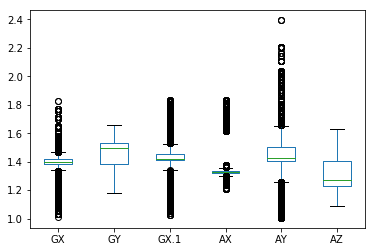

In [11]:
plt.show()

Both *AR_Data_Condition2.csv* & *AR_Data_Condition2_B.csv* appear to contain the same data, except that the former has subject numbers, header lines and several lines appended at the end for mean, median, etc. 

It also appears that subject #51 has no data for AZ, so that data will be discarded.

In [30]:
norm_cond2_file = os.path.join('..', 'data', 'Normal Data', 'AR_Data_Condition2.csv')
norm_cond2_data = pd.read_csv(norm_cond2_file, header=1)
norm_cond2_data.drop([25667, 25668, 25669, 25670], inplace=True)
norm_cond2_data.rename(columns={'Unnamed: 0': 'Subject'}, inplace=True)
norm_cond2_data.dropna(subset=['A Z'], inplace=True)
norm_subj2 = fill_in_subject_nums(norm_cond2_data['Subject'])
norm_cond2_data = norm_cond2_data.iloc[:, 1:7]

In [20]:
norm_subj2.unique()

array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
       28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
       45, 46, 47, 48, 49, 50])

In [31]:
norm_range2 = range_by_subject(norm_subj2, norm_cond2_data)

In [14]:
norm_cond2_data.where(norm_cond2_data != 0).plot.box()

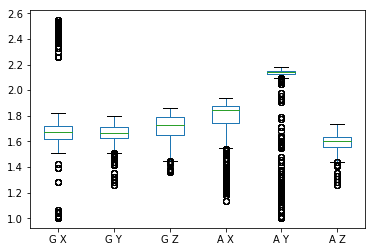

In [15]:
plt.show()

Combine abnormal & normal into a single dataframe with subject numbers, condition number, and labels. Abnormal will be labeled 1, and normal labeled 0. Write resulting dataframe to output file. Use the `combine_condition_data` function defined above.

In [32]:
cond2_combined = combine_condition_data(abnorm_range2.iloc[:10, :], norm_range2, 2)

In [33]:
cond2_output_file = os.path.join('..', 'data', 'processed', 'cond2_combined_range.csv')
cond2_combined.to_csv(cond2_output_file, index=False)

***

## Condition 3

Remember to define `fill_in_subject_nums` function from above.

*NOTE*: Worksheet for Condition 3 in *abnormal_data.xlsx* has an extra space after "Subject" in the header; correct this manually.

**April 24-25, 29-30**

In [34]:
abnormal_filename = os.path.join('..', 'data', 'Abnormal Data', 'abnormal_data.xlsx')
abnorm_sheet3 = pd.read_excel(abnormal_filename, sheetname='Condition 3')
cond3_abnorm_subj = fill_in_subject_nums(abnorm_sheet3['Subject'])
abnorm_data_3 = abnorm_sheet3.iloc[:, 1:]

Abnormal ranges for Condition 3:

In [35]:
abnorm_range3 = range_by_subject(cond3_abnorm_subj, abnorm_data_3)

In [17]:
abnorm_range3

GX        GY        GZ        AX        AY        AZ
1    0.216796  0.058594  0.410156  0.099609  0.723633  0.184570
2    0.331055  0.061524  0.281250  0.082031  0.896485  0.187500
3    0.811523  0.155274  0.832031  0.193360  1.986328  0.336915
4    0.670898  0.099609  0.708985  0.155273  1.508789  0.272461
5    0.711914  0.158203  0.829101  0.111328  1.725586  0.257813
6    0.023438  0.014648  0.017578  0.005860  0.055664  0.155273
7    0.404297  0.061524  0.380859  0.096680  1.031250  0.210937
8    0.316406  0.140625  0.515625  0.131836  0.635743  0.208008
9    0.410156  0.401367  0.386718  0.161133  0.140625  0.099610
10   0.416015  0.251953  0.158203  0.175781  0.120118  0.090820
11  10.121000  0.416015  0.251953  0.158203  0.175781  0.120118
12  10.861000  0.442383  0.216797  0.196289  0.111328  0.158203
13  11.068000  0.673828  0.459961  0.477539  0.193359  0.166992

Subjects 11-13 still with anomalous values for GX. Boxplot for subjects 1-10:

In [23]:
abnorm_data_3.where(abnorm_data_3 != 0).iloc[cond3_abnorm_subj.values < 11, :].plot.box()

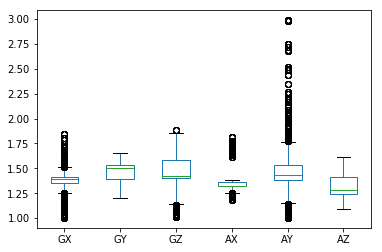

In [24]:
plt.show()

Upon visual inspection, there appears to be no difference between *AR_Data_Condition3_ Converted.xls* & *AR_Data_Condition3_ Coverted (Amanda Rodriguez's conflicted copy 2013-02-20).xls*. The data in *AR_Data_Condition3_B.csv* & *AR_Data_Condition3.csv* appear to be identical except that the latter has header lines, subject numbers and extra lines appended at the end of the file for mean, median, etc. The CSV files contain far more data than the XLS files; the XLS files have ~10000 rows while the CSV files have nearly triple that. The last subject number in the XLS files is 30 while the last subject number in the CSV files is 60. The data for subject 30 appears to be the same in the XLS & CSV files on visual inspection. 

In [36]:
norm_cond3_file = os.path.join('..', 'data', 'Normal Data', 'AR_Data_Condition3.csv')
norm_cond3_data = pd.read_csv(norm_cond3_file, header=1)
norm_cond3_data.drop([27505, 27506, 27507, 27508], inplace=True)
norm_cond3_data.rename(columns={'Unnamed: 0': 'Subject'}, inplace=True)
norm_subj3 = fill_in_subject_nums(norm_cond3_data['Subject'])
norm_cond3_data = norm_cond3_data.iloc[:, 1:7]

In [62]:
norm_subj3.unique()

array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
       28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
       45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60])

In [37]:
norm_range3 = range_by_subject(norm_subj3, norm_cond3_data)

In [27]:
norm_cond3_data.where(norm_cond3_data != 0).plot.box()

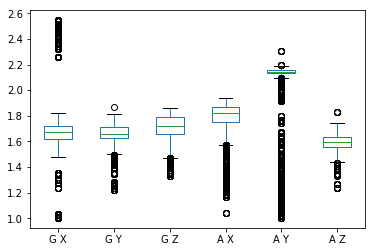

In [28]:
plt.show()

Combine abnormal & normal into a single dataframe with subject numbers, condition number, and labels. Abnormal will be labeled 1, and normal labeled 0. Write resulting dataframe to output file. Use the `combine_condition_data` function defined above.

In [38]:
cond3_combined = combine_condition_data(abnorm_range3.iloc[:10, :], norm_range3, 3)

In [39]:
cond3_output_file = os.path.join('..', 'data', 'processed', 'cond3_combined_range.csv')
cond3_combined.to_csv(cond3_output_file, index=False)

***

## Condition 4

*NOTE*: Worksheet for Condition 4 in *abnormal_data.xlsx* has an extra space after "Subject" in the header; correct this manually.

**April 25, 29-30**

In [40]:
abnormal_filename = os.path.join('..', 'data', 'Abnormal Data', 'abnormal_data.xlsx')
abnorm_sheet4 = pd.read_excel(abnormal_filename, sheetname='Condition 4')
cond4_abnorm_subj = fill_in_subject_nums(abnorm_sheet4['Subject'])
abnorm_data_4 = abnorm_sheet4.iloc[:, 1:]

Abnormal ranges by subject under Condition 4:

In [41]:
abnorm_range4 = range_by_subject(cond4_abnorm_subj, abnorm_data_4)

In [33]:
abnorm_range4

GX        GY        GZ        AX        AY        AZ
1   0.316406  0.067383  0.333984  0.140625  1.259766  0.166992
2   0.568360  0.087890  0.594726  0.137695  1.195313  0.225586
3   0.735352  0.149414  0.796875  0.143554  1.983399  0.363281
4   0.650391  0.202148  0.688477  0.155274  1.397460  0.333985
5   0.779297  0.123047  1.037109  0.082031  1.784180  0.284180
7   0.401367  0.058594  0.205078  0.073242  0.843750  0.178711
8   0.398437  0.161133  0.585938  0.169922  0.665039  0.290039
9   0.401367  0.351563  0.246094  0.152344  0.137696  0.117187
10  0.407227  0.322265  0.146485  0.187500  0.131836  0.120117
11  9.066000  0.407227  0.322265  0.146485  0.187500  0.131836
12  9.013000  0.278321  0.237305  0.228515  0.111328  0.146484
14  8.941000  0.462891  0.292969  0.272460  0.140625  0.105469

Here subjects 11, 12 & 14 have anomalous values for GX. Discarding that data yields the boxplot below:

In [33]:
abnorm_data_4.where(abnorm_data_4 != 0).iloc[cond4_abnorm_subj.values < 11, :].plot.box()

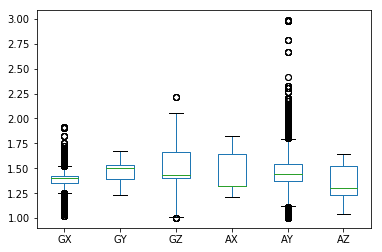

In [34]:
plt.show()

Files *AR_Data_Condition4.csv* & *AR_Data_Condition4_B.csv* appear to contain the same data on visual inspection, except that the former contains header lines, subject numbers and extra lines appended for mean, median, etc.

In [42]:
norm_cond4_file = os.path.join('..', 'data', 'Normal Data', 'AR_Data_Condition4.csv')
norm_cond4_data = pd.read_csv(norm_cond4_file, header=1)
norm_cond4_data.drop([27183, 27184, 27185, 27186], inplace=True)
norm_cond4_data.rename(columns={'Unnamed: 0': 'Subject'}, inplace=True)
norm_subj4 = fill_in_subject_nums(norm_cond4_data['Subject'])
norm_cond4_data = norm_cond4_data.iloc[:, 1:7]

In [63]:
norm_subj4.unique()

array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
       28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
       45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60])

In [41]:
norm_cond4_data.tail()

G X       G Y       G Z       A X       A Y       A Z
27178  1.731445  1.749023  1.708008  1.895508  2.150391  1.608398
27179  1.731445  1.740234  1.708008  1.895508  2.150391  1.608398
27180  1.731445  1.740234  1.678711  1.895508  2.150391  1.608398
27181  1.731445  1.740234  1.678711  1.798828  2.150391  1.608398
27182  1.731445  1.740234  1.678711  1.798828  2.167969  1.608398

In [43]:
norm_range4 = range_by_subject(norm_subj4, norm_cond4_data)

In [37]:
norm_cond4_data.where(norm_cond4_data != 0).plot.box()

In [38]:
plt.show()

Combine abnormal & normal into a single dataframe with subject numbers, condition number, and labels. Abnormal will be labeled 1, and normal labeled 0. Write resulting dataframe to output file. Use the `combine_condition_data` function defined above.

In [44]:
cond4_combined = combine_condition_data(abnorm_range4.iloc[:9, :], norm_range4, 4)

In [45]:
cond4_output_file = os.path.join('..', 'data', 'processed', 'cond4_combined_range.csv')
cond4_combined.to_csv(cond4_output_file, index=False)

***

## Condition 5

*NOTE*: Worksheet for Condition 5 in *abnormal_data.xlsx* has an extra space after "Subject" in the header; correct this manually.

**April 25, 29-30**

In [46]:
abnormal_filename = os.path.join('..', 'data', 'Abnormal Data', 'abnormal_data.xlsx')
abnorm_sheet5 = pd.read_excel(abnormal_filename, sheetname='Condition 5')
abnorm_subj5 = fill_in_subject_nums(abnorm_sheet5['Subject'])
abnorm_data_5 = abnorm_sheet5.iloc[:, 1:]
abnorm_range5 = range_by_subject(abnorm_subj5, abnorm_data_5)

In [54]:
abnorm_range5

GX        GY        GZ        AX        AY        AZ
1   0.292969  0.064453  0.457031  0.146485  1.101562  0.205078
2   0.574219  0.096680  0.521484  0.123047  1.122070  0.284179
3   0.960937  0.123047  1.042969  0.137695  1.959961  0.413086
4   0.802734  0.108398  0.744141  0.152344  1.426758  0.325196
5   0.793945  0.158203  0.779297  0.123047  1.977539  0.339844
6   0.216796  0.152344  0.096680  0.032226  0.594726  0.172851
7   0.017578  0.008789  0.020508  0.002929  0.043945  0.161132
8   0.650391  0.152344  0.550781  0.137696  0.351563  0.304688
9   0.574219  0.407226  0.222656  0.166992  0.149414  0.117188
10  0.594727  0.310547  0.187500  0.140625  0.187500  0.125976
11  9.346000  0.594727  0.310547  0.187500  0.140625  0.187500
12  8.152000  1.001953  0.240234  0.257813  0.164063  0.193359
13  8.612000  0.583008  0.418945  0.307617  0.164063  0.158203

Subjects 11-13 with anomalous values in GX. Boxplot with that data discarded:

In [43]:
abnorm_data_5.where(abnorm_data_5 != 0).iloc[abnorm_subj5.values < 11, :].plot.box()

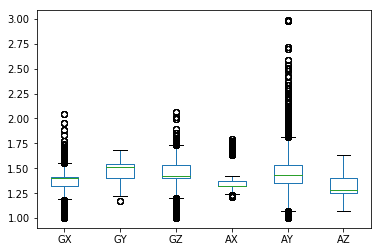

In [44]:
plt.show()

On visual inspection, files *AR_Data_Condition5.csv* & *AR_Data_Condition5_B.csv* appear to contain the same data except that the former has header lines, subject numbers and extra lines appended for mean, median, etc. Excel spreadsheet *AR_Data_Condition5_Converted.xls* contains about half as much data, ending at subject 30 while the CSV files end at subject 60.

In [47]:
norm_cond5_file = os.path.join('..', 'data', 'Normal Data', 'AR_Data_Condition5.csv')
norm_cond5_data = pd.read_csv(norm_cond5_file, header=1)
norm_cond5_data.drop([28115, 28116, 28117, 28118], inplace=True)
norm_cond5_data.rename(columns={'Unnamed: 0': 'Subject'}, inplace=True)
norm_subj5 = fill_in_subject_nums(norm_cond5_data['Subject'])
norm_cond5_data = norm_cond5_data.iloc[:, 1:7]

In [61]:
norm_subj5.unique()

array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
       28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
       45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60])

In [48]:
norm_range5 = range_by_subject(norm_subj5, norm_cond5_data)

In [47]:
norm_cond5_data.where(norm_cond5_data != 0).plot.box()

In [48]:
plt.show()

Combine abnormal & normal into a single dataframe with subject numbers, condition number, and labels. Abnormal will be labeled 1, and normal labeled 0. Write resulting dataframe to output file. Use the `combine_condition_data` function defined above.

In [49]:
cond5_combined = combine_condition_data(abnorm_range5.iloc[:10, :], norm_range5, 5)

In [50]:
cond5_output_file = os.path.join('..', 'data', 'processed', 'cond5_combined_range.csv')
cond5_combined.to_csv(cond5_output_file, index=False)

***

## Condition 6

*NOTE*: Worksheet for Condition 5 in *abnormal_data.xlsx* has an extra space after "Subject" in the header; correct this manually.

**April 26, 29**

In [51]:
abnormal_filename = os.path.join('..', 'data', 'Abnormal Data', 'abnormal_data.xlsx')
abnorm_sheet6 = pd.read_excel(abnormal_filename, sheetname='Condition 6')
abnorm_subj6 = fill_in_subject_nums(abnorm_sheet6['Subject'])
abnorm_data_6 = abnorm_sheet6.iloc[:, 1:]
abnorm_range6 = range_by_subject(abnorm_subj6, abnorm_data_6)

In [15]:
abnorm_range6

GX        GY        GZ        AX        AY        AZ
1   0.249023  0.082031  0.278320  0.134766  1.092774  0.187500
2   0.164062  0.035156  0.149414  0.020508  0.284180  0.172851
3   0.243164  0.046875  0.310546  0.043945  0.662109  0.172852
4   0.893555  0.164063  0.694336  0.161132  1.209960  0.292969
5   0.808594  0.096679  0.624023  0.076172  1.359375  0.295899
6   0.521484  0.102539  0.741211  0.114258  1.429688  0.158203
7   0.471680  0.090820  0.483399  0.128907  1.022461  0.249023
8   0.363281  0.254883  0.887696  0.137695  0.410157  0.184570
9   0.369140  0.439453  0.351563  0.158203  0.120117  0.128906
10  0.568359  0.524414  0.295898  0.213867  0.184570  0.164063
11  6.656000  0.568359  0.524414  0.295898  0.213867  0.184570
12  9.418000  0.644531  0.295898  0.328125  0.193360  0.131836
13  8.109000  0.539062  0.533203  0.533203  0.152344  0.193359

Subjects 11-13 with anomalous data in GX. Boxplot with that data from those subjects discarded:

In [52]:
abnorm_data_6.where(abnorm_data_6 != 0).iloc[abnorm_subj6.values < 11, :].plot.box()

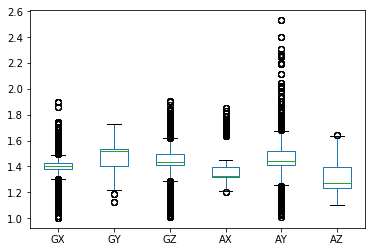

In [53]:
plt.show()

On visual inspection, files *AR_Data_Condition6.csv* & *AR_Data_Condition6_B.csv* contain the same data except that the former contains header lines, subject numbers & extra rows appended for mean, median, etc. The Microsoft Excel spreadsheet *AR_Data_Condition6_ converted.xls* contains far less data than the CSV files, containing 8778 data rows and ending at subject 30 while the CSV files end at subject 60 and contain 24473 data rows. 

In [52]:
norm_cond6_file = os.path.join('..', 'data', 'Normal Data', 'AR_Data_Condition6.csv')
norm_cond6_data = pd.read_csv(norm_cond6_file, header=1)
norm_cond6_data.drop([24473, 24474, 24475, 24476], inplace=True)
norm_cond6_data.rename(columns={'Unnamed: 0': 'Subject'}, inplace=True)
norm_subj6 = fill_in_subject_nums(norm_cond6_data['Subject'])
norm_cond6_data = norm_cond6_data.iloc[:, 1:7]

In [25]:
norm_subj6.unique()

array([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
       28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
       45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60])

In [53]:
norm_range6 = range_by_subject(norm_subj6, norm_cond6_data)

In [56]:
norm_cond6_data.where(norm_cond6_data != 0).plot.box()

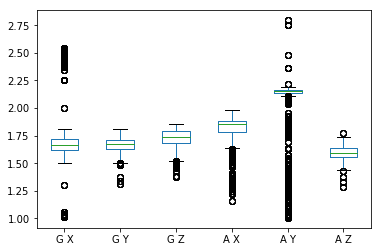

In [57]:
plt.show()

Combine abnormal & normal into a single dataframe with subject numbers, condition number, and labels. Abnormal will be labeled 1, and normal labeled 0. Write resulting dataframe to output file. Use the `combine_condition_data` function defined above.

In [54]:
cond6_combined = combine_condition_data(abnorm_range6.iloc[:10, :], norm_range6, 6)

In [55]:
cond6_output_file = os.path.join('..', 'data', 'processed', 'cond6_combined_range.csv')
cond6_combined.to_csv(cond6_output_file, index=False)

***

## Condition 7

*NOTE*: Excel spreadsheet *abnormal_data.xlsx* has an extra column "Time" prepended.

**April 28-30**

In [56]:
abnormal_filename = os.path.join('..', 'data', 'Abnormal Data', 'abnormal_data.xlsx')
abnorm_sheet7 = pd.read_excel(abnormal_filename, sheetname='Condition 7')
abnorm_sheet7 = abnorm_sheet7.drop('Time', axis=1)
abnorm_subj7 = fill_in_subject_nums(abnorm_sheet7['Subject'])
abnorm_data_7 = abnorm_sheet7.iloc[:, 1:]
abnorm_range7 = range_by_subject(abnorm_subj7, abnorm_data_7)

In [16]:
abnorm_range7

GX        GY        GZ        AX        AY        AZ
1   0.328125  0.082031  0.313477  0.125976  1.048828  0.190429
2   0.820313  0.123047  0.785157  0.175781  1.505860  0.307617
3   0.972656  0.205078  1.417969  0.260742  1.974610  0.366211
4   0.143555  0.029297  0.146484  0.020508  0.512696  0.158203
5   0.808594  0.149414  0.682617  0.143555  1.845704  0.328125
6   0.764649  0.131836  1.028320  0.108399  1.977540  0.266602
7   0.096680  0.058594  0.143554  0.046875  0.175781  0.158203
8   1.971680  0.190430  1.910157  0.216797  1.916016  0.615234
9   0.307617  0.325195  0.178711  0.114258  0.114258  0.108398
10  0.518554  0.398437  0.216797  0.202148  0.111328  0.149414
11  0.518554  0.398437  0.216797  0.202148  0.111328  0.149414
12  0.556641  0.222656  0.284180  0.169922  0.131836  0.111328
13  1.004883  0.474609  0.732421  0.181640  0.228515  0.134765

Here in Condition 7, it appears that subjects 11-13 do not have anomalous data in GX, as was the case in all other previous conditions. Nonetheless, for consistency the data for these subjects will be discarded as was done in all other previous conditions. 

In [61]:
abnorm_data_7.where(abnorm_data_7 != 0).iloc[abnorm_subj7.values < 11, :].plot.box()

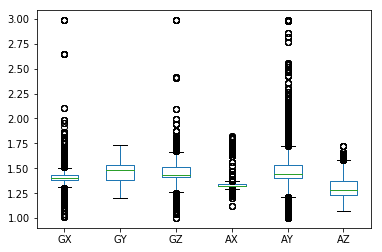

In [62]:
plt.show()

On visual inspection, files *AR_Data_Condition7.csv* & *AR_Data_Condition7_B.csv* contain the same data. However, unfortunately neither file contains subject numbers. 

In [61]:
norm_cond7_file = os.path.join('..', 'data', 'Normal Data', 'AR_Data_Condition7_B.csv')
norm_cond7_data = pd.read_csv(norm_cond7_file, header=None)
norm_cond7_data.columns = ['GX', 'GY', 'GZ', 'AX', 'AY', 'AZ']

In [63]:
norm_cond7_data.tail()

GX        GY        GZ        AX       AY        AZ
25646  1.710937  1.766602  1.772461  1.769531  2.15625  1.546875
25647  1.737305  1.766602  1.772461  1.769531  2.15625  1.546875
25648  1.737305  1.661133  1.772461  1.769531  2.15625  1.546875
25649  1.737305  1.661133  1.772461  1.769531  2.15625  1.546875
25650  1.769531  1.661133  1.772461  1.769531  2.15625  1.546875

***

## Combine All

Combine data from all conditions into a single dataframe.

**April 30**

In [65]:
full_data = pd.DataFrame()
for i in range(1, 7):
    filename = 'cond{}_combined_range.csv'.format(i)
    filepath = os.path.join('..', 'data', 'processed', filename)
    df = pd.read_csv(filepath)
    full_data = pd.concat([full_data, df])

Write out full dataframe to output file.

In [66]:
output_file = os.path.join('..', 'data', 'processed', 'combined_cond_ranges.csv')
full_data.to_csv(output_file, index=False)